In [5]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

In [6]:
# Read the csv file into a pandas DataFrame

ill = pd.read_csv('Illinois.csv')
ill.head()

,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BusinessType,LoanStatus,GrossApproval,SBAGuarantee,InterestRate,...,NaicsCode,NaicsDescription,JobsSupported,DeliveryMethod,subpgmdesc,BankName,BankStreet,BankCity,BankState,BankZip
0,"Happy Cars, Inc.",701 B Davidson Drive,Minooka,IL,60447,CORPORATION,CHGOFF,15000,12750,8.00,...,811111,General Automotive Repair,2,COMM EXPRS,Community Express,Umpqua Bank,"445 SE Main St, First Fl",ROSEBURG,OR,97470
1,ROYAL CLEANERS,17851 S. 80TH AVE.,TINLEY PARK,IL,60477,INDIVIDUAL,CHGOFF,15000,13500,8.00,...,812320,Drycleaning and Laundry Services (except Coin-...,2,COMM EXPRS,Community Express,Bank of Hope,"3200 Wilshire Blvd, Ste 1400",LOS ANGELES,CA,90010
2,CDJ Consulting Inc.,227 S 3rd St Flr 2,GENEVA,IL,60134,CORPORATION,CHGOFF,25000,12500,8.35,...,722110,Full-Service Restaurants,36,SBA EXPRES,FA$TRK (Small Loan Express),"JPMorgan Chase Bank, National Association",1111 Polaris Pkwy,COLUMBUS,OH,43240
3,AMAN CREATIONS INC,298 BRAEMAR GLN,BOLINGBROOK,IL,60440,CORPORATION,CHGOFF,20000,10000,6.75,...,423990,Other Miscellaneous Durable Goods Merchant Who...,12,SBA EXPRES,FA$TRK (Small Loan Express),U.S. Bank National Association,425 Walnut St,Cincinnati,OH,45202
4,"Canaan Global Enterprise, LLC",1736 West 119th Street,Chicago,IL,60643,CORPORATION,CHGOFF,25000,22500,8.00,...,812320,Drycleaning and Laundry Services (except Coin-...,7,COMM EXPRS,Community Express,Umpqua Bank,"445 SE Main St, First Fl",ROSEBURG,OR,97470


In [31]:
X = ill[["Status", "NaicsCode", "GrossApproval"]]
y = ill["BorrZip"].values.reshape(-1, 1)
print(X.shape, y.shape)

(14793, 3) (14793, 1)


In [32]:

model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["GrossApproval"])
data_binary_encoded.head()

,Status,NaicsCode,GrossApproval_5000,GrossApproval_5600,GrossApproval_5700,GrossApproval_6000,GrossApproval_6500,GrossApproval_7000,GrossApproval_7100,GrossApproval_7400,...,GrossApproval_4860000,GrossApproval_4925000,GrossApproval_4937000,GrossApproval_4950000,GrossApproval_4953000,GrossApproval_4960000,GrossApproval_4992000,GrossApproval_4992700,GrossApproval_4995000,GrossApproval_5000000
0,1,811111,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,812320,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,722110,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,423990,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,812320,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.model_selection import train_test_split

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=63)

X_train.head()

,Status,NaicsCode,GrossApproval
7610,0,484121,25000
13551,0,448310,1191000
9440,0,454390,25000
7207,0,423450,100000
2942,0,561110,100000


In [44]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [45]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [46]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["GrossApproval"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["GrossApproval"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

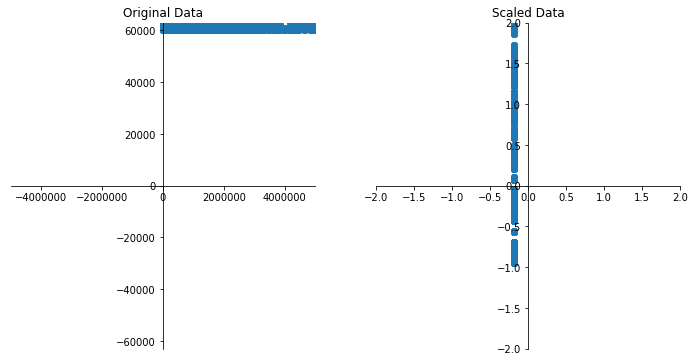

In [47]:
plt.show()

In [ ]:
X = pd.get_dummies(brain[["size", "gender", "age"]])
y = brain["weight"].values.reshape(-1, 1)
X.head()